In [2]:
import pandas as pd


In [4]:
# Read the CSV file
df = pd.read_csv('/Users/hannahwurzel/Downloads/data660k.csv')


In [5]:
# Explore the data
# Display the first few rows
print(df.head())



   Unnamed: 0  start_date  fire_ID      lat      lon  size  perimeter  \
0     2566038  2005-07-02   584383  -6.7438  22.3535  0.21       1.85   
1     3258696  2005-12-06   250743   8.8188   3.2881  0.21       1.85   
2     5600233  2008-07-27   640420 -15.0104  27.6267  0.86       3.70   
3     3644868  2006-09-10   637240 -16.2812  24.7243  1.29       4.63   
4     7274504  2010-09-24   396369 -12.9688  18.0960  1.71       6.48   

   start_DOY    end_date  end_DOY  duration  expansion  fire_line  speed  \
0        183  2005-07-02      183         1       0.21       0.46   0.46   
1        340  2005-12-06      340         1       0.21       0.46   0.46   
2        209  2008-07-30      212         4       0.21       0.46   0.50   
3        253  2006-09-10      253         1       1.29       2.78   0.85   
4        267  2010-09-25      268         2       0.86       1.85   0.86   

   direction direction_s  landcover     landcover_s tile_ID  \
0          0        none          8  Wood

In [6]:
# Get the summary statistics
print(df.describe())


         Unnamed: 0       fire_ID            lat            lon  \
count  6.625300e+05  6.625300e+05  662530.000000  662530.000000   
mean   6.627141e+06  4.738093e+05       2.809916      21.599453   
std    3.827644e+06  2.751339e+05      20.760880      50.553300   
min    1.200000e+01  6.000000e+00     -50.672900    -179.960000   
25%    3.307967e+06  2.358808e+05     -12.493700       3.102300   
50%    6.627926e+06  4.724195e+05      -2.043800      24.201750   
75%    9.945029e+06  7.093478e+05      11.243700      36.389675   
max    1.325056e+07  1.020563e+06      69.997900     179.980900   

                size      perimeter      start_DOY        end_DOY  \
count  662530.000000  662530.000000  662530.000000  662530.000000   
mean        4.304536       8.372648     190.137133     190.204321   
std        29.045052      15.630645     102.566725     103.019042   
min         0.210000       1.850000       1.000000       1.000000   
25%         0.210000       1.850000     105.000000 

In [7]:
# Check the data types of columns
print(df.dtypes)


Unnamed: 0       int64
start_date      object
fire_ID          int64
lat            float64
lon            float64
size           float64
perimeter      float64
start_DOY        int64
end_date        object
end_DOY          int64
duration         int64
expansion      float64
fire_line      float64
speed          float64
direction        int64
direction_s     object
landcover        int64
landcover_s     object
tile_ID         object
geometry        object
dtype: object


In [8]:
# Check the number of rows and columns
print(df.shape)


(662530, 20)


In [9]:
# Check for missing values
print(df.isnull().sum())


Unnamed: 0     0
start_date     0
fire_ID        0
lat            0
lon            0
size           0
perimeter      0
start_DOY      0
end_date       0
end_DOY        0
duration       0
expansion      0
fire_line      0
speed          0
direction      0
direction_s    0
landcover      0
landcover_s    0
tile_ID        0
geometry       0
dtype: int64


In [10]:
total_null_values = df.isnull().sum().sum()
print("Total sum of null values in the records:", total_null_values)


Total sum of null values in the records: 0


In [11]:
column_count = len(df.columns)
column_names = df.columns.tolist()

print("Column names:")
for name in column_names:
    print("- " + name)
print("Total column count:", column_count)


Column names:
- Unnamed: 0
- start_date
- fire_ID
- lat
- lon
- size
- perimeter
- start_DOY
- end_date
- end_DOY
- duration
- expansion
- fire_line
- speed
- direction
- direction_s
- landcover
- landcover_s
- tile_ID
- geometry
Total column count: 20


Focus on the below mentioned variables and relatioship between them during visualization

The following column names are common for model training between linear regression and random forest:

lat
lon
size
duration
These columns were identified as potential candidates for both linear regression and random forest models. They are numerical features and were considered to have a potential impact on the target variable in both linear and nonlinear ways. Therefore, they can be used for training both types of models.

Linear Regression

Linear regression assumes a linear relationship between the features (independent variables) and the target variable (dependent variable). It is most effective when the relationship between the features and the target is roughly linear. Based on this assumption, the following columns may be suitable for linear regression:

lat: Latitude might have a linear relationship with the target variable (e.g., fire size, duration).
lon: Longitude might have a linear relationship with the target variable.
size: The size of the fire could have a linear impact on the target variable (e.g., the damage caused).
duration: The duration of the fire might have a linear relationship with the target variable.
It's important to note that linear regression might not be suitable for columns like fire_ID, start_date, end_date, and tile_ID, as these are categorical or temporal features and do not have a linear impact on the target variable.

Random Forest

Random forest is an ensemble learning method that can handle both numerical and categorical features. It is effective in capturing complex relationships between features and the target variable. For random forest, the following columns can be considered:

lat: Latitude could still be useful in capturing nonlinear patterns.
lon: Longitude might also be useful in capturing nonlinear patterns.
size: The size of the fire could impact the target variable in a nonlinear manner.
perimeter: Similar to size, perimeter might also impact the target nonlinearly.
duration: The duration of the fire could have a nonlinear relationship with the target variable.
expansion: The expansion of the fire might be an important nonlinear predictor.
fire_line: Depending on how this feature is encoded, it might be useful for the random forest.
speed: The speed of the fire could impact the target in a nonlinear manner.
direction: The direction of the fire might be relevant in predicting the target.
landcover: Landcover type might have a nonlinear impact on the target.
geometry: Depending on how the geometry is represented, it might be useful for the random forest.
Some columns like fire_ID, start_date, end_date, start_DOY, end_DOY, direction_s, landcover_s, and tile_ID may not be directly useful for the random forest as they are categorical or temporal features.

Comparison b/w Linear Regression & Random Forest

In summary, for linear regression, we can consider columns like lat, lon, size, and duration. For random forest, we can consider a broader set of columns including lat, lon, size, perimeter, duration, expansion, fire_line, speed, direction, landcover, and geometry, among others. The final selection of features will depend on the specific problem, the target variable, and the relationships between the features and the target. Feature engineering and domain knowledge can further refine the selection process.

Focus for Visualization (EDA)

start_date and end_date:

Observation: These columns represent the start and end dates of each fire event.
Plot: A time series plot can be used to visualize the occurrence of fires over time. You can plot the count of fires over months or years to observe any temporal patterns or trends.
fire_ID:

Observation: This column likely contains unique identifiers for each fire event.
Plot: A bar plot or a count plot can be used to visualize the distribution of fires across different fire IDs.
lat and lon:

Observation: These columns represent the latitude and longitude coordinates of the fire events' locations.
Plot: A scatter plot can be used to visualize the geographical distribution of fires on a map. You can use latitude and longitude as X and Y axes, respectively, and plot each fire event as a point on the map.
size and perimeter:

Observation: These columns represent the size and perimeter of each fire event, respectively.
Plot: Histograms or density plots can be used to visualize the distribution of fire sizes and perimeters. Additionally, a scatter plot with size on one axis and perimeter on the other can help identify any correlation between these two attributes.
start_DOY and end_DOY:

Observation: These columns represent the day of the year when each fire event started and ended.
Plot: A histogram or a line plot can be used to visualize the distribution of fire occurrences based on the day of the year. This can help identify any seasonal patterns in fire incidents.
duration:

Observation: This column represents the duration of each fire event (end_DOY - start_DOY).
Plot: A histogram or a box plot can be used to visualize the distribution of fire durations.
expansion, fire_line, speed, and direction:

Observation: These columns might contain information about how the fire spread and its characteristics.
Plot: Box plots or violin plots can be used to compare the distribution of fire expansion, fire line, speed, and direction with respect to different categorical variables (if available) like landcover or tile_ID.
direction_s and landcover_s:

Observation: These columns might contain categorical labels or codes corresponding to the fire direction and landcover type.
Plot: Count plots or bar plots can be used to visualize the distribution of fire direction and landcover types. This can help identify which directions are more common or which landcover types are more susceptible to fires.
tile_ID and geometry:

Observation: These columns might be related to some geographical tiling or geometry representations.
Plot: Depending on the nature of the data, you can use specialized visualization libraries to create geographic heatmaps or choropleth maps based on the tile_ID or geometry information to visualize spatial patterns of fires.

Correlation Analysis:

Compute the correlation matrix between numerical columns (e.g., lat, lon, size, perimeter, duration, expansion, speed) using Pearson correlation coefficient or other appropriate methods.
Visualize the correlation matrix as a heatmap to identify strong positive or negative correlations between columns.
Scatter Plots:

Create scatter plots to visualize the relationship between numerical columns. For example, you can plot size against duration, expansion against speed, or any other combinations of numerical columns.
Observe the scatter plots to identify any patterns, trends, or potential linear relationships between the variables.
Bar Plots and Grouped Bar Plots:

Use bar plots or grouped bar plots to compare categorical columns (e.g., landcover_s, direction_s) against numerical columns (e.g., size, duration, speed).
This can help identify how different categories impact the numerical variables.
Time Series Plots:

Utilize time series plots to visualize the distribution of fires over time using start_date and end_date columns.
Observe any patterns or trends in fire occurrences over different time periods.
Box Plots or Violin Plots:

Use box plots or violin plots to visualize the distribution of numerical columns for different categories in categorical columns.
For example, you can create box plots to compare the distribution of fire size for different landcover types.
Geospatial Visualization:

Utilize geospatial visualizations to explore the relationship between latitude, longitude, and other numerical or categorical columns.
For example, plot the fire events on a map with color-coded markers representing different attributes like size or expansion.


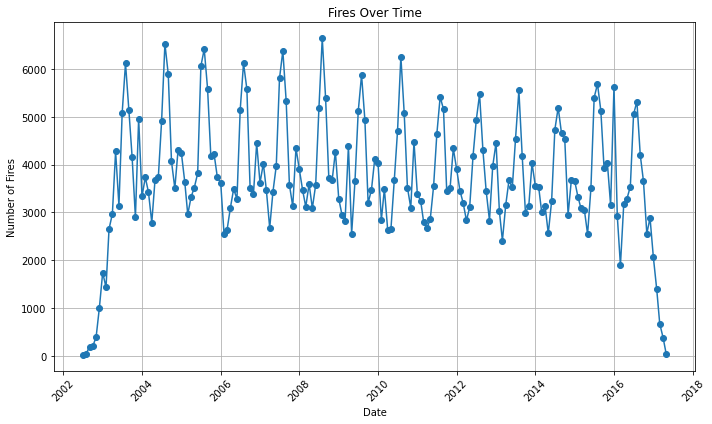

In [12]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Assuming you have the start_date and end_date columns in a DataFrame called 'df'
# If your data is stored in a CSV file, you can read it into a DataFrame like this:
# df = pd.read_csv('your_data_file.csv')

# Convert the 'start_date' and 'end_date' columns to pandas datetime objects
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

# Extract the year and month from the 'start_date' column
df['year'] = df['start_date'].dt.year
df['month'] = df['start_date'].dt.month

# Group the data by year and month and calculate the count of fires in each group
fires_by_month = df.groupby(['year', 'month']).size().reset_index(name='fire_count')

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(fires_by_month[['year', 'month']].assign(day=1)), fires_by_month['fire_count'], marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Fires')
plt.title('Fires Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


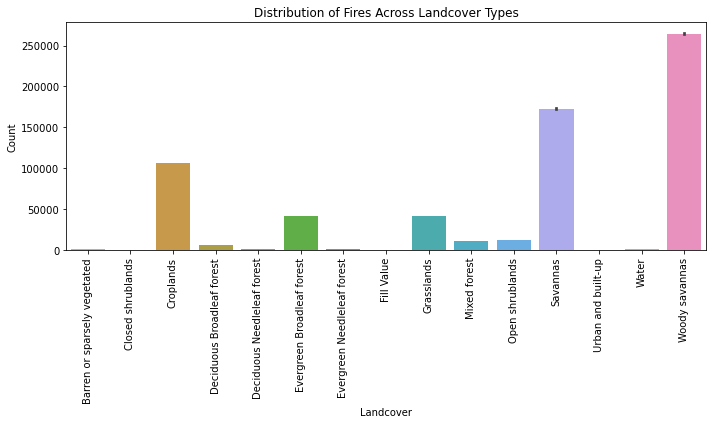

In [13]:
# Import necessary libraries
import numpy as np
import seaborn as sns

# Assuming you have the 'fire_ID' and 'landcover_s' columns in the DataFrame 'df'
# If your data is stored in a CSV file, you can read it into a DataFrame like this:
# df = pd.read_csv('your_data_file.csv')

# Aggregate data by landcover_s and fire_ID
fires_by_landcover = df.groupby(['landcover_s', 'fire_ID']).size().reset_index(name='fire_count')

# Plot the count plot
plt.figure(figsize=(10, 6))
sns.barplot(x='landcover_s', y='fire_count', data=fires_by_landcover, estimator=sum)
plt.xlabel('Landcover')
plt.ylabel('Count')
plt.title('Distribution of Fires Across Landcover Types')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


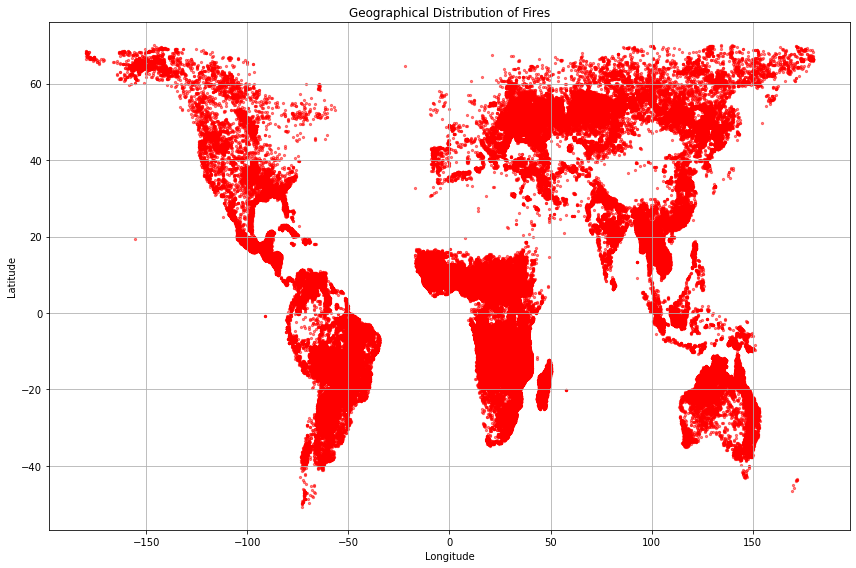

In [14]:
# Create the scatter plot on a map
plt.figure(figsize=(12, 8))

# Plot the scatter points
plt.scatter(df['lon'], df['lat'], s=5, c='red', alpha=0.5)

# Customize the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Fires')
plt.grid(True)
plt.tight_layout()
plt.show()

Or

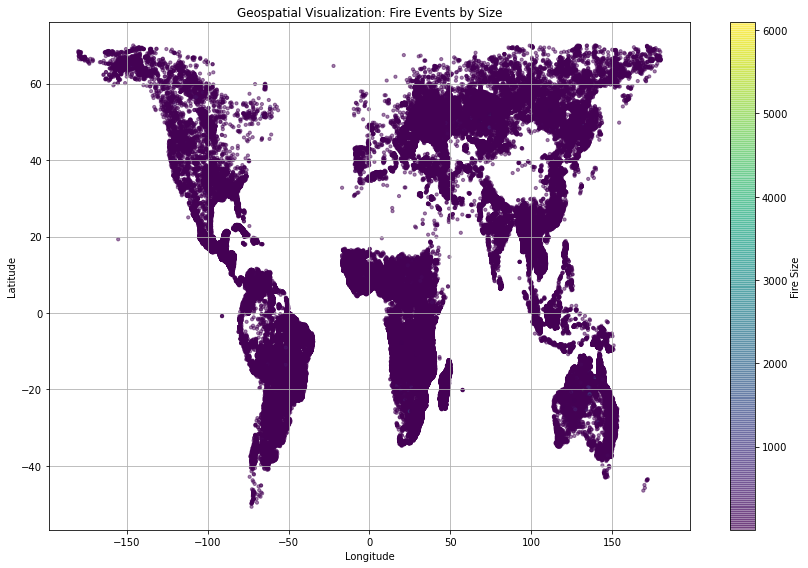

In [15]:
import matplotlib.pyplot as plt
# Utilize geospatial visualizations to explore the relationship between latitude, longitude, and other numerical or categorical columns
plt.figure(figsize=(12, 8))

# Scatter plot of fire events on a map with color-coded markers representing 'size'
plt.scatter(df['lon'], df['lat'], c=df['size'], cmap='viridis', alpha=0.5, s=10) #s=10
plt.colorbar(label='Fire Size')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geospatial Visualization: Fire Events by Size')
plt.grid(True)
plt.tight_layout()
plt.show()


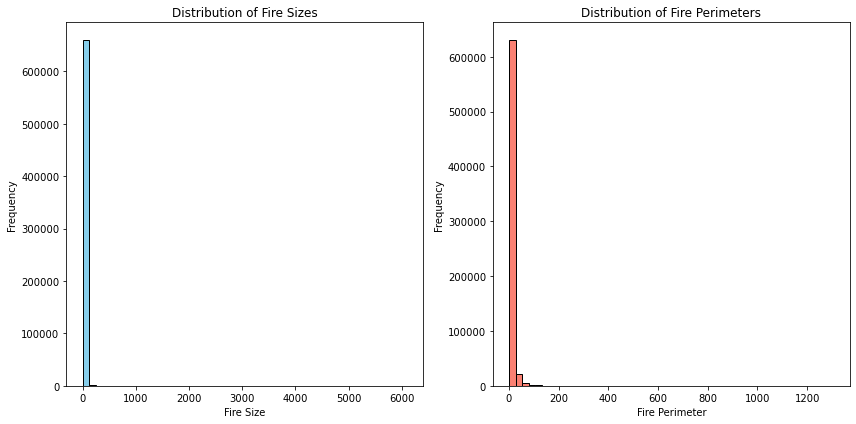

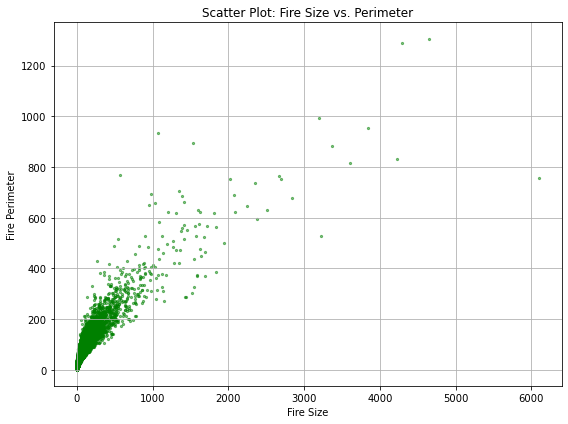

In [16]:
# Create histograms for fire sizes and perimeters
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['size'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Fire Size')
plt.ylabel('Frequency')
plt.title('Distribution of Fire Sizes')

plt.subplot(1, 2, 2)
plt.hist(df['perimeter'], bins=50, color='salmon', edgecolor='black')
plt.xlabel('Fire Perimeter')
plt.ylabel('Frequency')
plt.title('Distribution of Fire Perimeters')

plt.tight_layout()
plt.show()

# Create a scatter plot for fire size vs. perimeter
plt.figure(figsize=(8, 6))
plt.scatter(df['size'], df['perimeter'], s=5, c='green', alpha=0.5)
plt.xlabel('Fire Size')
plt.ylabel('Fire Perimeter')
plt.title('Scatter Plot: Fire Size vs. Perimeter')
plt.grid(True)
plt.tight_layout()
plt.show()

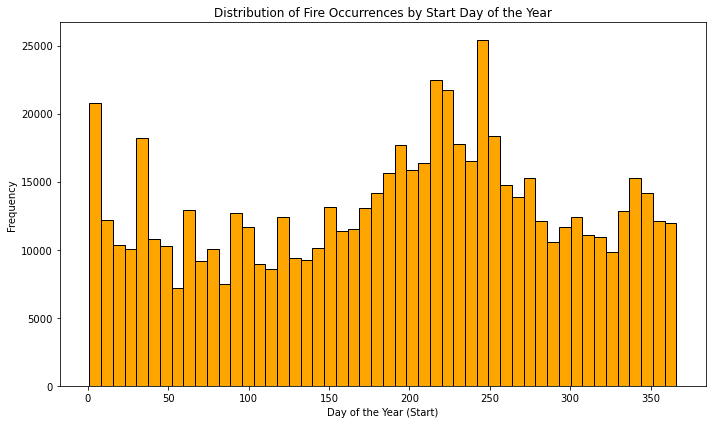

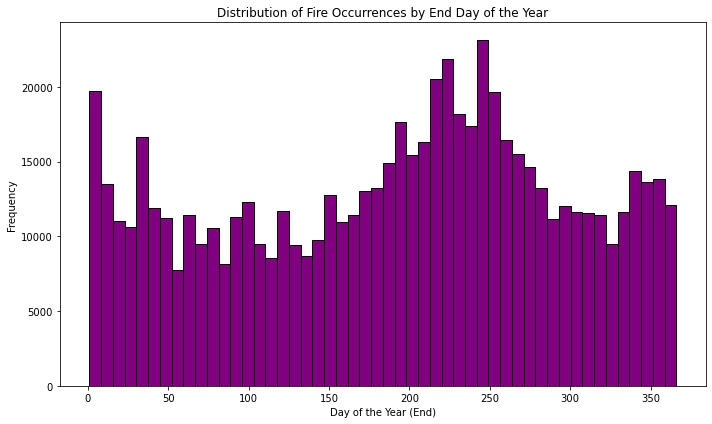

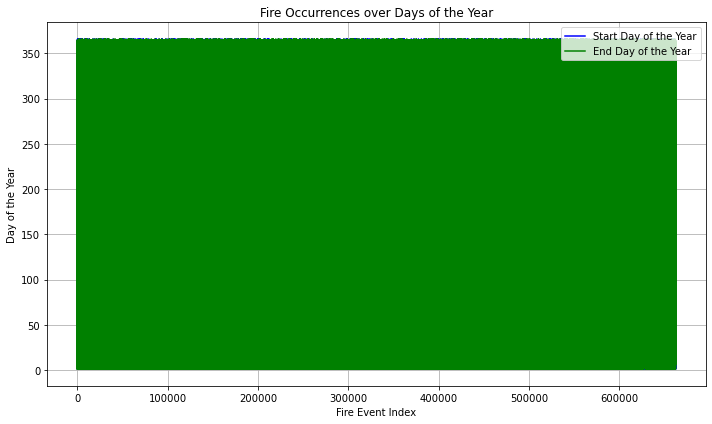

In [17]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the 'start_DOY' and 'end_DOY' columns in the DataFrame 'df'
# If your data is stored in a CSV file, you can read it into a DataFrame like this:
# df = pd.read_csv('your_data_file.csv')

# Create a histogram for fire occurrences based on start_DOY
plt.figure(figsize=(10, 6))
plt.hist(df['start_DOY'], bins=50, color='orange', edgecolor='black')
plt.xlabel('Day of the Year (Start)')
plt.ylabel('Frequency')
plt.title('Distribution of Fire Occurrences by Start Day of the Year')
plt.tight_layout()
plt.show()

# Create a histogram for fire occurrences based on end_DOY
plt.figure(figsize=(10, 6))
plt.hist(df['end_DOY'], bins=50, color='purple', edgecolor='black')
plt.xlabel('Day of the Year (End)')
plt.ylabel('Frequency')
plt.title('Distribution of Fire Occurrences by End Day of the Year')
plt.tight_layout()
plt.show()

# Create a line plot for fire occurrences over the days of the year
plt.figure(figsize=(10, 6))
plt.plot(df['start_DOY'], label='Start Day of the Year', color='blue')
plt.plot(df['end_DOY'], label='End Day of the Year', color='green')
plt.xlabel('Fire Event Index')
plt.ylabel('Day of the Year')
plt.title('Fire Occurrences over Days of the Year')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


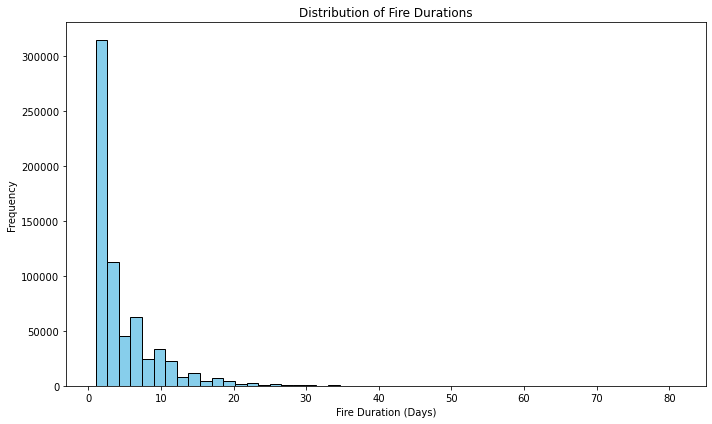

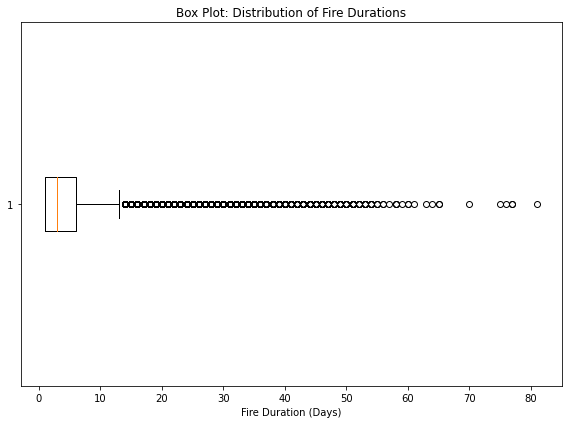

In [18]:
# Create a histogram for fire durations
plt.figure(figsize=(10, 6))
plt.hist(df['duration'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Fire Duration (Days)')
plt.ylabel('Frequency')
plt.title('Distribution of Fire Durations')
plt.tight_layout()
plt.show()

# Create a box plot for fire durations
plt.figure(figsize=(8, 6))
plt.boxplot(df['duration'], vert=False)
plt.xlabel('Fire Duration (Days)')
plt.title('Box Plot: Distribution of Fire Durations')
plt.tight_layout()
plt.show()


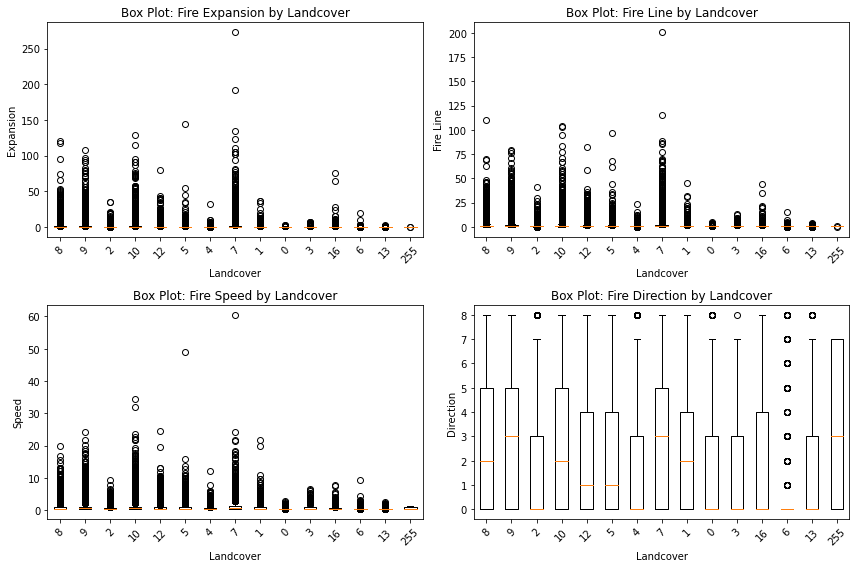

In [19]:
# Create box plots for fire expansion, fire line, speed, and direction grouped by landcover
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.boxplot([df[df['landcover'] == lc]['expansion'] for lc in df['landcover'].unique()])
plt.xticks(range(1, len(df['landcover'].unique()) + 1), df['landcover'].unique(), rotation=45)
plt.xlabel('Landcover')
plt.ylabel('Expansion')
plt.title('Box Plot: Fire Expansion by Landcover')

plt.subplot(2, 2, 2)
plt.boxplot([df[df['landcover'] == lc]['fire_line'] for lc in df['landcover'].unique()])
plt.xticks(range(1, len(df['landcover'].unique()) + 1), df['landcover'].unique(), rotation=45)
plt.xlabel('Landcover')
plt.ylabel('Fire Line')
plt.title('Box Plot: Fire Line by Landcover')

plt.subplot(2, 2, 3)
plt.boxplot([df[df['landcover'] == lc]['speed'] for lc in df['landcover'].unique()])
plt.xticks(range(1, len(df['landcover'].unique()) + 1), df['landcover'].unique(), rotation=45)
plt.xlabel('Landcover')
plt.ylabel('Speed')
plt.title('Box Plot: Fire Speed by Landcover')

plt.subplot(2, 2, 4)
plt.boxplot([df[df['landcover'] == lc]['direction'] for lc in df['landcover'].unique()])
plt.xticks(range(1, len(df['landcover'].unique()) + 1), df['landcover'].unique(), rotation=45)
plt.xlabel('Landcover')
plt.ylabel('Direction')
plt.title('Box Plot: Fire Direction by Landcover')

plt.tight_layout()
plt.show()



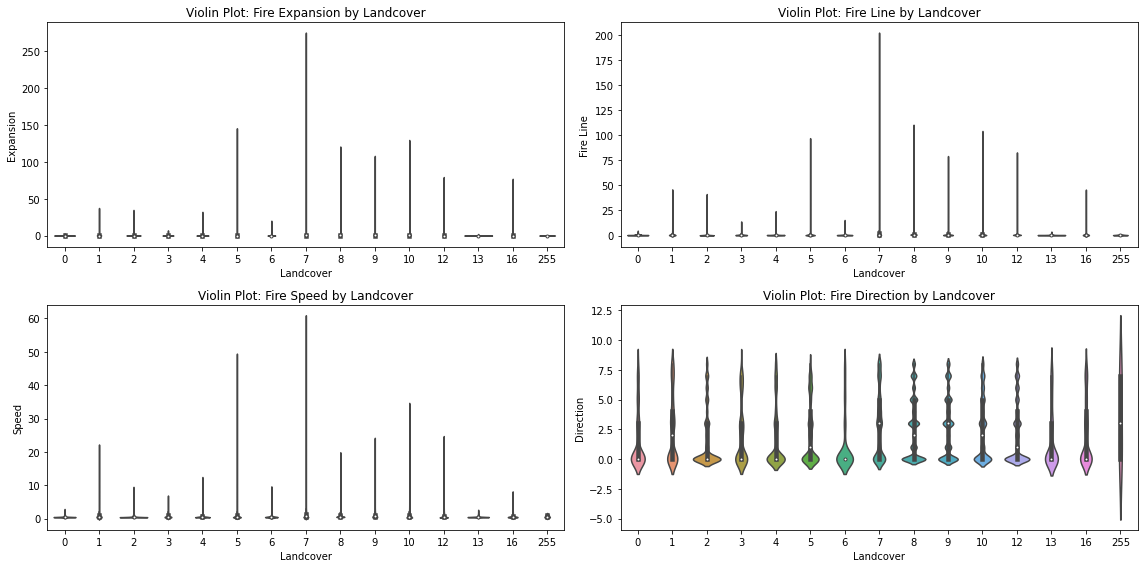

In [20]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the 'expansion', 'fire_line', 'speed', 'direction', 'landcover', and 'tile_ID' columns in the DataFrame 'df'
# If your data is stored in a CSV file, you can read it into a DataFrame like this:
# df = pd.read_csv('your_data_file.csv')

# Create violin plots for fire expansion, fire line, speed, and direction grouped by landcover
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
sns.violinplot(x='landcover', y='expansion', data=df)
plt.xlabel('Landcover')
plt.ylabel('Expansion')
plt.title('Violin Plot: Fire Expansion by Landcover')

plt.subplot(2, 2, 2)
sns.violinplot(x='landcover', y='fire_line', data=df)
plt.xlabel('Landcover')
plt.ylabel('Fire Line')
plt.title('Violin Plot: Fire Line by Landcover')

plt.subplot(2, 2, 3)
sns.violinplot(x='landcover', y='speed', data=df)
plt.xlabel('Landcover')
plt.ylabel('Speed')
plt.title('Violin Plot: Fire Speed by Landcover')

plt.subplot(2, 2, 4)
sns.violinplot(x='landcover', y='direction', data=df)
plt.xlabel('Landcover')
plt.ylabel('Direction')
plt.title('Violin Plot: Fire Direction by Landcover')

plt.tight_layout()
plt.show()



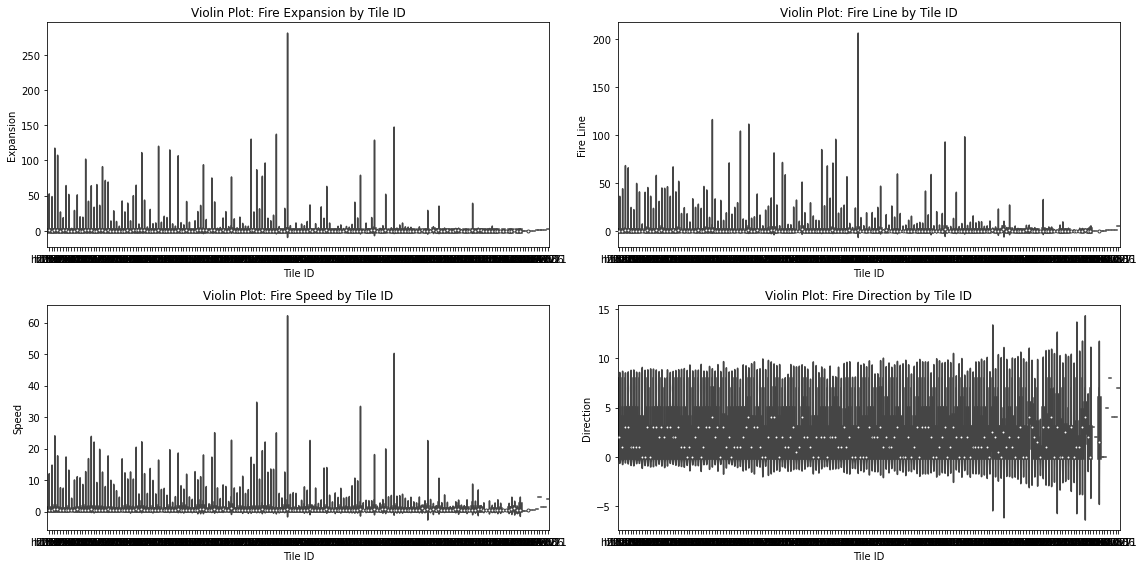

In [21]:
# Create violin plots for fire expansion, fire line, speed, and direction grouped by tile_ID
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
sns.violinplot(x='tile_ID', y='expansion', data=df)
plt.xlabel('Tile ID')
plt.ylabel('Expansion')
plt.title('Violin Plot: Fire Expansion by Tile ID')

plt.subplot(2, 2, 2)
sns.violinplot(x='tile_ID', y='fire_line', data=df)
plt.xlabel('Tile ID')
plt.ylabel('Fire Line')
plt.title('Violin Plot: Fire Line by Tile ID')

plt.subplot(2, 2, 3)
sns.violinplot(x='tile_ID', y='speed', data=df)
plt.xlabel('Tile ID')
plt.ylabel('Speed')
plt.title('Violin Plot: Fire Speed by Tile ID')

plt.subplot(2, 2, 4)
sns.violinplot(x='tile_ID', y='direction', data=df)
plt.xlabel('Tile ID')
plt.ylabel('Direction')
plt.title('Violin Plot: Fire Direction by Tile ID')

plt.tight_layout()
plt.show()


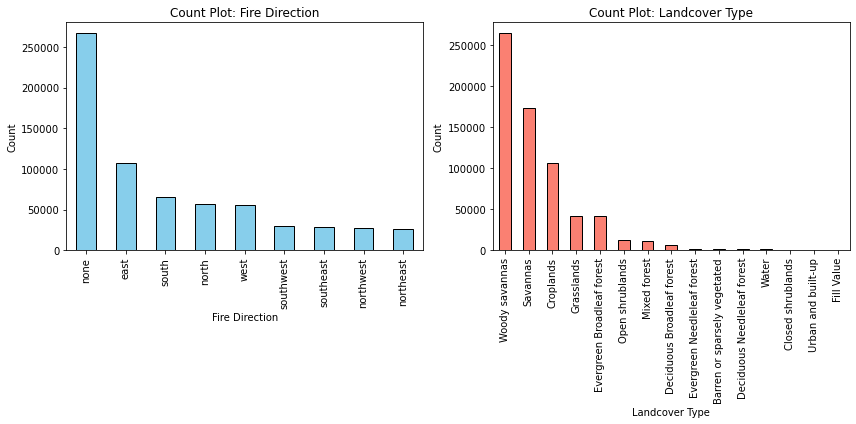

In [22]:
# Assuming you have the 'direction_s' and 'landcover_s' columns in the DataFrame 'df'
# If your data is stored in a CSV file, you can read it into a DataFrame like this:
# df = pd.read_csv('your_data_file.csv')

# Create count plots for fire direction and landcover types
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df['direction_s'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Fire Direction')
plt.ylabel('Count')
plt.title('Count Plot: Fire Direction')

plt.subplot(1, 2, 2)
df['landcover_s'].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
plt.xlabel('Landcover Type')
plt.ylabel('Count')
plt.title('Count Plot: Landcover Type')

plt.tight_layout()
plt.show()


Correlation Analysis

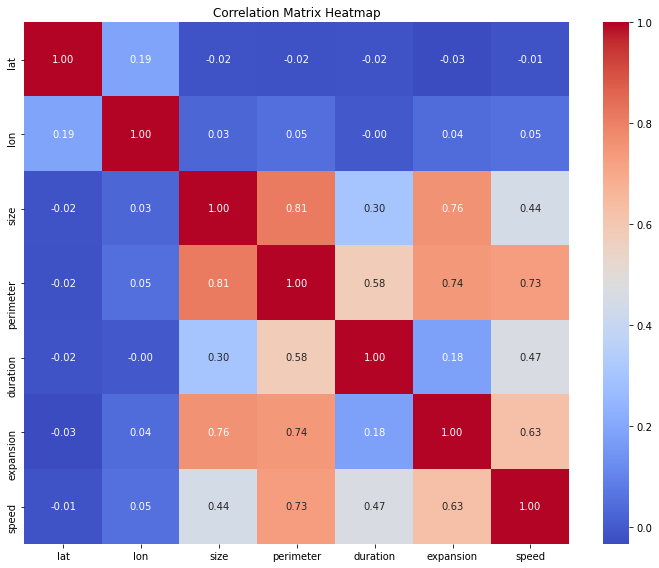

In [23]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the 'lat', 'lon', 'size', 'perimeter', 'duration', 'expansion', 'speed' columns in the DataFrame 'df'
# If your data is stored in a CSV file, you can read it into a DataFrame like this:
# df = pd.read_csv('your_data_file.csv')

# Select the numerical columns for correlation analysis
numerical_columns = ['lat', 'lon', 'size', 'perimeter', 'duration', 'expansion', 'speed']

# Compute the correlation matrix using Pearson correlation coefficient
correlation_matrix = df[numerical_columns].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


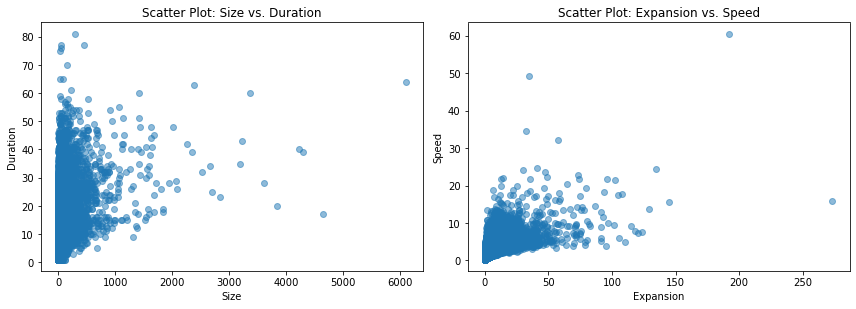

In [24]:
# Create scatter plots to visualize the relationship between numerical columns
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(df['size'], df['duration'], alpha=0.5)
plt.xlabel('Size')
plt.ylabel('Duration')
plt.title('Scatter Plot: Size vs. Duration')

plt.subplot(2, 2, 2)
plt.scatter(df['expansion'], df['speed'], alpha=0.5)
plt.xlabel('Expansion')
plt.ylabel('Speed')
plt.title('Scatter Plot: Expansion vs. Speed')

plt.tight_layout()
plt.show()


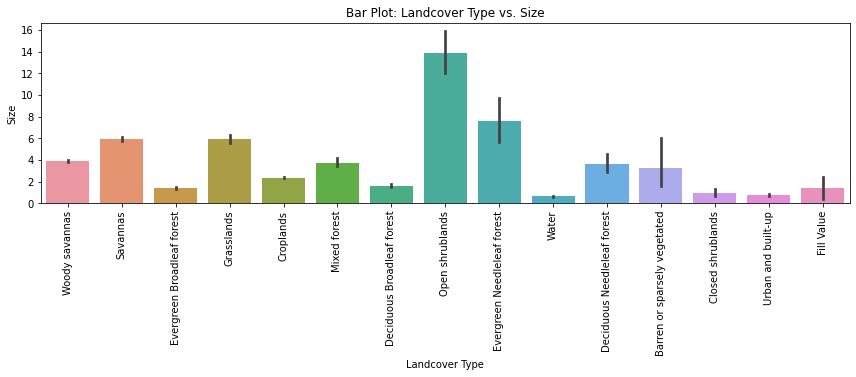

In [25]:
# Use bar plots or grouped bar plots to compare categorical columns against numerical columns
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.barplot(x='landcover_s', y='size', data=df)
plt.xlabel('Landcover Type')
plt.ylabel('Size')
plt.title('Bar Plot: Landcover Type vs. Size')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


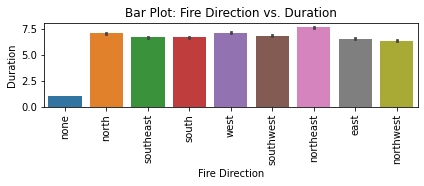

In [26]:
plt.subplot(2, 1, 2)
sns.barplot(x='direction_s', y='duration', data=df)
plt.xlabel('Fire Direction')
plt.ylabel('Duration')
plt.title('Bar Plot: Fire Direction vs. Duration')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


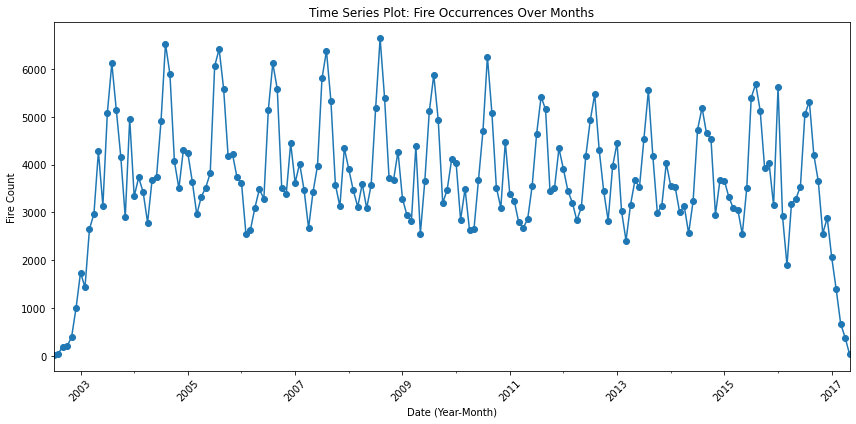

In [27]:
# Utilize time series plots to visualize the distribution of fires over time
plt.figure(figsize=(12, 6))
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

# Plot the count of fires over months
df['start_date'].dt.to_period('M').value_counts().sort_index().plot(kind='line', marker='o')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Fire Count')
plt.title('Time Series Plot: Fire Occurrences Over Months')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Tree Based Feature Importance:

In [31]:
pip install category_encoders


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.1 MB/s eta 0:00:00a 0:00:01m

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [29]:
#incase of issues with above command then execute the below given command
#pip install --user category_encoders


Tree-Based Feature Importance: 15-20 minute execution time (max)

In [32]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestRegressor

# Assuming you have the DataFrame 'df' with the specified columns and 'perimeter' as the target variable
# Extract the target variable and the features
y = df['expansion']
X = df.drop(['expansion', 'geometry'], axis=1)

# Use label encoding for ordinal categorical features
label_encoder = LabelEncoder()
ordinal_categorical_features = ['fire_ID','lat','lon','size','start_DOY','end_DOY','duration','perimeter','fire_line','speed','direction', 'landcover']  # Update this list based on domain knowledge if available

# Specify the list of column names for ordinal categorical features
for feature in ordinal_categorical_features:
    X[feature] = label_encoder.fit_transform(X[feature])

# Use target encoding for nominal categorical features
nominal_categorical_features = ['start_date','end_date','direction_s','landcover_s','tile_ID']
# Specify the list of column names for nominal categorical features
target_encoder = TargetEncoder(cols=nominal_categorical_features)
X = target_encoder.fit_transform(X, y)

# Create the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)  # Use all available CPU cores
# If still getting error or taking too long for execution then put value for estimators as 50 or 25 respectively.

# Fit the model to the data
rf_model.fit(X, y)

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances along with their corresponding column names
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Print the feature importances
print(feature_importance_df)


        Feature  Importance
11    fire_line    0.929122
12        speed    0.018791
5          size    0.012809
17      tile_ID    0.006810
6     perimeter    0.006352
10     duration    0.003611
2       fire_ID    0.002923
4           lon    0.002919
3           lat    0.002828
7     start_DOY    0.002567
0    Unnamed: 0    0.001985
9       end_DOY    0.001823
13    direction    0.001537
16  landcover_s    0.001512
15    landcover    0.001460
14  direction_s    0.001241
18         year    0.000862
19        month    0.000848
1    start_date    0.000000
8      end_date    0.000000


Top few features from Tree-based Feature Selection Results are: fire_line, end_date, speed, size and start_date, tile_ID and perimeter.


Recursive feature elimination (RFE): It is not suitable for large datasets as is the case for our dataset. Moreover it takes very long time for execution. Therefore, it will not be used in our project.

Lasso (L1 Regularization): 2-3 minute execution time (max)

In [33]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
import numpy as np

# Assuming you have already loaded the dataframe 'df' with (662530, 20) shape

# Separate target variable (expansion) from the features
X = df.drop(columns=['expansion', 'geometry'])
y = df['expansion']

# Lists of nominal and ordinal categorical features
nominal_categorical_features = ['start_date', 'end_date', 'direction_s', 'landcover_s', 'tile_ID']
ordinal_categorical_features = ['fire_ID', 'lat', 'lon', 'size', 'start_DOY', 'end_DOY', 'duration', 'perimeter', 'fire_line', 'speed', 'direction', 'landcover']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Define the transformations for the features
ordinal_transformer = StandardScaler()
nominal_transformer = OneHotEncoder(handle_unknown='ignore')

# Column transformer to apply different preprocessing to nominal and ordinal features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', ordinal_transformer, ordinal_categorical_features),
        ('cat', nominal_transformer, nominal_categorical_features)
    ])

# Create the ElasticNet regression model
alpha = 0.1  # Set the regularization strength (decrease the value to reduce regularization)
l1_ratio = 0.5  # Set the balance between L1 and L2 penalties (0.5 for equal L1 and L2, 1.0 for LASSO)
elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)

# Combine preprocessing and model into a single pipeline
elastic_net_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('elasticnet', elastic_net_model)])

# Fit the ElasticNet model to the training data
elastic_net_pipeline.fit(X_train, y_train)

# Get the feature importances (coefficients) from the ElasticNet model
# Note: Coefficients with value 0 are considered unimportant and are removed by ElasticNet
feature_names = preprocessor.get_feature_names_out(input_features=X_train.columns)
feature_importances = elastic_net_model.coef_

# Create a dataframe to show the feature importance values with their corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': np.abs(feature_importances)})

# Sort the dataframe by importance (descending order) to see the most important features first
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Filter to keep only the features with non-zero importance values
non_zero_features_df = feature_importance_df[feature_importance_df['Importance'] != 0]

print(non_zero_features_df)


          Feature  Importance
8  num__fire_line    1.163352
3       num__size    0.413359
9      num__speed    0.044186
6   num__duration    0.035140


Model Training using Tree-based feature importance results (24-26 minutes execution time approximately)

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# We can remove perimeter feature from X-axis.
# Assuming 'expansion' is the name of your target variable column
X = df[["fire_line", "speed", "size", "perimeter"]]

# We can remove tile_ID from the code.
# One-hot encode the 'tile_ID' column
tile_id_encoded = pd.get_dummies(df["tile_ID"], prefix="tile")
X = pd.concat([X, tile_id_encoded], axis=1)

# Convert "start_date" and "end_date" columns to numeric features (using timestamp in seconds)
X["start_date"] = (pd.to_datetime(df["start_date"]) - pd.Timestamp("1970-01-01")) // pd.Timedelta(seconds=1)
X["end_date"] = (pd.to_datetime(df["end_date"]) - pd.Timestamp("1970-01-01")) // pd.Timedelta(seconds=1)

y = df["expansion"]

# Splitting the data into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the training set for both models
linear_reg_train_predictions = linear_reg_model.predict(X_train)
rf_train_predictions = rf_model.predict(X_train)

# Calculating metrics for Linear Regression on the training set
linear_reg_mae_train = mean_absolute_error(y_train, linear_reg_train_predictions)
linear_reg_mse_train = mean_squared_error(y_train, linear_reg_train_predictions)
linear_reg_rmse_train = np.sqrt(linear_reg_mse_train)
linear_reg_r2_train = r2_score(y_train, linear_reg_train_predictions)

# Calculating metrics for Random Forest Regressor on the training set
rf_mae_train = mean_absolute_error(y_train, rf_train_predictions)
rf_mse_train = mean_squared_error(y_train, rf_train_predictions)
rf_rmse_train = np.sqrt(rf_mse_train)
rf_r2_train = r2_score(y_train, rf_train_predictions)

# Printing the metrics for Linear Regression
print("Linear Regression - Training Set")
print("MAE:", linear_reg_mae_train)
print("MSE:", linear_reg_mse_train)
print("RMSE:", linear_reg_rmse_train)
print("R²:", linear_reg_r2_train)

# Printing the metrics for Random Forest Regressor
print("\nRandom Forest Regressor - Training Set")
print("MAE:", rf_mae_train)
print("MSE:", rf_mse_train)
print("RMSE:", rf_rmse_train)
print("R²:", rf_r2_train)

# Predicting on the test set for both models
linear_reg_test_predictions = linear_reg_model.predict(X_test)
rf_test_predictions = rf_model.predict(X_test)

# Calculating metrics for Linear Regression on the test set
linear_reg_mae_test = mean_absolute_error(y_test, linear_reg_test_predictions)
linear_reg_mse_test = mean_squared_error(y_test, linear_reg_test_predictions)
linear_reg_rmse_test = np.sqrt(linear_reg_mse_test)
linear_reg_r2_test = r2_score(y_test, linear_reg_test_predictions)

# Calculating metrics for Random Forest Regressor on the test set
rf_mae_test = mean_absolute_error(y_test, rf_test_predictions)
rf_mse_test = mean_squared_error(y_test, rf_test_predictions)
rf_rmse_test = np.sqrt(rf_mse_test)
rf_r2_test = r2_score(y_test, rf_test_predictions)

# Printing the metrics for Linear Regression on the test set
print("\nLinear Regression - Test Set")
print("MAE:", linear_reg_mae_test)
print("MSE:", linear_reg_mse_test)
print("RMSE:", linear_reg_rmse_test)
print("R²:", linear_reg_r2_test)

# Printing the metrics for Random Forest Regressor on the test set
print("\nRandom Forest Regressor - Test Set")
print("MAE:", rf_mae_test)
print("MSE:", rf_mse_test)
print("RMSE:", rf_rmse_test)
print("R²:", rf_r2_test)


Linear Regression - Training Set
MAE: 0.1693036124308928
MSE: 0.2551887424615317
RMSE: 0.5051620952343235
R²: 0.9109181738513383

Random Forest Regressor - Training Set
MAE: 0.012202612334580892
MSE: 0.02454270384378826
RMSE: 0.15666111145969908
R²: 0.9914325810145798

Linear Regression - Test Set
MAE: 0.1706372611616857
MSE: 0.23086133640822284
RMSE: 0.4804803184400198
R²: 0.9142675164658379

Random Forest Regressor - Test Set
MAE: 0.03283582328351894
MSE: 0.13729332661237986
RMSE: 0.3705311412180896
R²: 0.9490148586754567


Result Visualization

Scatter Plot: Create scatter plots to visualize the actual target values (y_test) against the predicted values for both models (linear_reg_test_predictions and rf_test_predictions). This will give you an idea of how well the models are predicting the target variable.


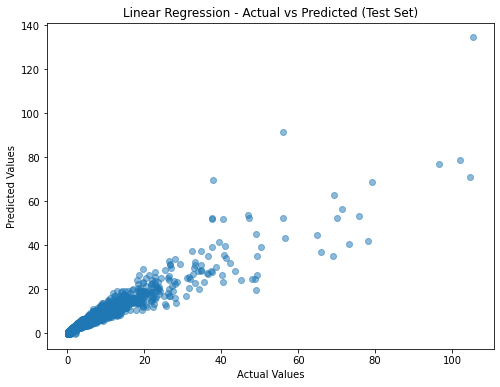

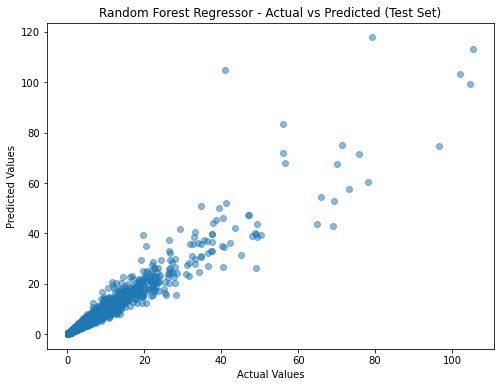

In [35]:
import matplotlib.pyplot as plt

# Scatter plot for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_reg_test_predictions, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression - Actual vs Predicted (Test Set)")
plt.show()

# Scatter plot for Random Forest Regressor
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_test_predictions, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regressor - Actual vs Predicted (Test Set)")
plt.show()


Residual Plot: Plot the residuals (the difference between the actual target values and the predicted values) for both models on the test set. Residual plots help you identify patterns in the errors and check if the model is biased or underfitting/overfitting.


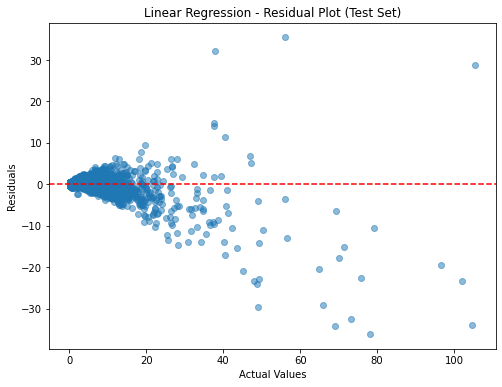

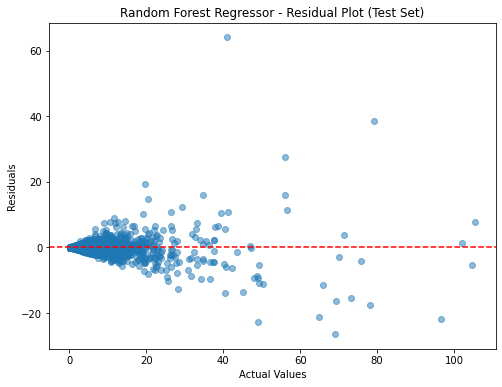

In [36]:
# Residual plot for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_reg_test_predictions - y_test, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Linear Regression - Residual Plot (Test Set)")
plt.show()

# Residual plot for Random Forest Regressor
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_test_predictions - y_test, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Random Forest Regressor - Residual Plot (Test Set)")
plt.show()


Bar Plot: Create a bar plot to compare the mean absolute error (MAE), mean squared error (MSE), root mean squared error (RMSE), and R-squared (R²) values for both models on both the training and test sets. This will give you a quick overview of how well each model performs.


<Figure size 720x432 with 0 Axes>

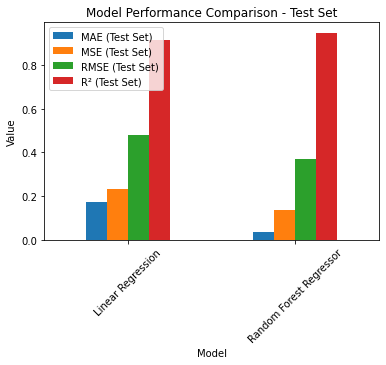

In [37]:
# Bar plot for model metrics
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regressor'],
    'MAE (Test Set)': [linear_reg_mae_test, rf_mae_test],
    'MSE (Test Set)': [linear_reg_mse_test, rf_mse_test],
    'RMSE (Test Set)': [linear_reg_rmse_test, rf_rmse_test],
    'R² (Test Set)': [linear_reg_r2_test, rf_r2_test]
})

plt.figure(figsize=(10, 6))
metrics_df.plot(x='Model', kind='bar')
plt.title('Model Performance Comparison - Test Set')
plt.ylabel('Value')
plt.xlabel('Model')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()


Model Comparison Plot: Create a side-by-side comparison plot of the actual values and predicted values for both models. This can help you visualize how well each model fits the data.


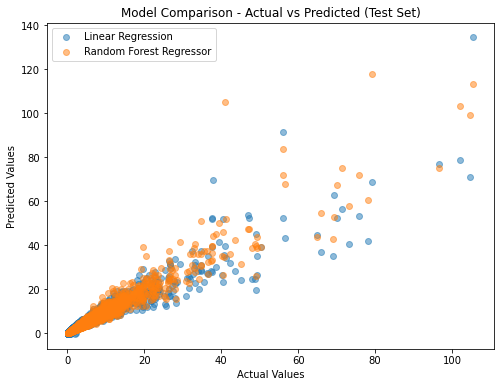

In [38]:
# Model Comparison Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_reg_test_predictions, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, rf_test_predictions, alpha=0.5, label='Random Forest Regressor')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Model Comparison - Actual vs Predicted (Test Set)")
plt.legend()
plt.show()


We can further implement plots for learning curves or overfitting plot but they are strongly dependent on n_estimators value nad size of the dataset and may take a long time depending on the load they exert on the system. Thus, we have not included them here.

Learning Curves: Used to plot the learning curves for both models to visualize how the model performance changes as the size of the training set increases. Learning curves can help you understand if your models would benefit from more data.

Overfitting Plot: Used to plot the training and test errors (MSE or RMSE) for both models as a function of the model complexity (e.g., the number of estimators in Random Forest). This can help you detect overfitting or underfitting.

Hopefully, this shall give you some understanding about these plots in case you wish to use them in some other project.

Model Training based on Lasso (L1 Regularization Results)- Approx 7 minute execution time

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming your dataframe is already loaded and named "df"

# Splitting the data into features (X) and target variable (y)
X = df[['fire_line', 'size', 'speed', 'duration']]
y = df['expansion']

# Splitting the data into training and testing sets with an 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training - Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Model training - Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the training set
y_train_pred_lr = lr_model.predict(X_train)
y_train_pred_rf = rf_model.predict(X_train)

# Evaluating the models on the training set
mae_lr_train = mean_absolute_error(y_train, y_train_pred_lr)
mse_lr_train = mean_squared_error(y_train, y_train_pred_lr)
rmse_lr_train = np.sqrt(mse_lr_train)
r2_lr_train = r2_score(y_train, y_train_pred_lr)

mae_rf_train = mean_absolute_error(y_train, y_train_pred_rf)
mse_rf_train = mean_squared_error(y_train, y_train_pred_rf)
rmse_rf_train = np.sqrt(mse_rf_train)
r2_rf_train = r2_score(y_train, y_train_pred_rf)

print("Linear Regression - Training Set Metrics:")
print("MAE:", mae_lr_train)
print("MSE:", mse_lr_train)
print("RMSE:", rmse_lr_train)
print("R²:", r2_lr_train)

print("\nRandom Forest Regressor - Training Set Metrics:")
print("MAE:", mae_rf_train)
print("MSE:", mse_rf_train)
print("RMSE:", rmse_rf_train)
print("R²:", r2_rf_train)

# Predicting on the test set
y_test_pred_lr = lr_model.predict(X_test)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluating the models on the test set
mae_lr_test = mean_absolute_error(y_test, y_test_pred_lr)
mse_lr_test = mean_squared_error(y_test, y_test_pred_lr)
rmse_lr_test = np.sqrt(mse_lr_test)
r2_lr_test = r2_score(y_test, y_test_pred_lr)

mae_rf_test = mean_absolute_error(y_test, y_test_pred_rf)
mse_rf_test = mean_squared_error(y_test, y_test_pred_rf)
rmse_rf_test = np.sqrt(mse_rf_test)
r2_rf_test = r2_score(y_test, y_test_pred_rf)

print("\nLinear Regression - Test Set Metrics:")
print("MAE:", mae_lr_test)
print("MSE:", mse_lr_test)
print("RMSE:", rmse_lr_test)
print("R²:", r2_lr_test)

print("\nRandom Forest Regressor - Test Set Metrics:")
print("MAE:", mae_rf_test)
print("MSE:", mse_rf_test)
print("RMSE:", rmse_rf_test)
print("R²:", r2_rf_test)


Linear Regression - Training Set Metrics:
MAE: 0.17618099217610272
MSE: 0.2787827382874546
RMSE: 0.5279988051951013
R²: 0.9026819318680779

Random Forest Regressor - Training Set Metrics:
MAE: 0.0065380186558705485
MSE: 0.021322513873749165
RMSE: 0.14602230608283503
R²: 0.9925566917426223

Linear Regression - Test Set Metrics:
MAE: 0.17763891517236055
MSE: 0.25560333178690814
RMSE: 0.50557228146617
R²: 0.9050793486053927

Random Forest Regressor - Test Set Metrics:
MAE: 0.017457561921836024
MSE: 0.11373052118145603
RMSE: 0.3372395605225698
R²: 0.957765123488328


Result Visualization

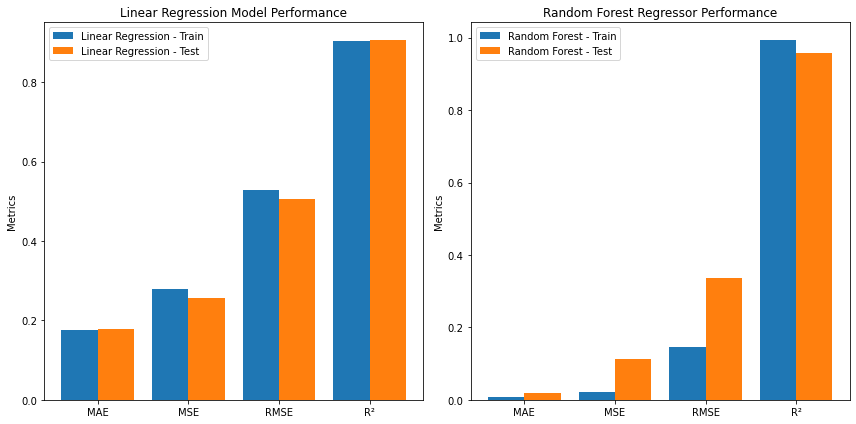

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Line Plot - Training and Test Set Performance
metrics = ['MAE', 'MSE', 'RMSE', 'R²']
lr_train_metrics = [mae_lr_train, mse_lr_train, rmse_lr_train, r2_lr_train]
rf_train_metrics = [mae_rf_train, mse_rf_train, rmse_rf_train, r2_rf_train]
lr_test_metrics = [mae_lr_test, mse_lr_test, rmse_lr_test, r2_lr_test]
rf_test_metrics = [mae_rf_test, mse_rf_test, rmse_rf_test, r2_rf_test]

plt.figure(figsize=(12, 6))
x = range(len(metrics))

plt.subplot(121)
plt.bar(x, lr_train_metrics, width=0.4, label='Linear Regression - Train', align='center')
plt.bar([i + 0.4 for i in x], lr_test_metrics, width=0.4, label='Linear Regression - Test', align='center')
plt.xticks([i + 0.2 for i in x], metrics)
plt.ylabel('Metrics')
plt.title('Linear Regression Model Performance')
plt.legend()

plt.subplot(122)
plt.bar(x, rf_train_metrics, width=0.4, label='Random Forest - Train', align='center')
plt.bar([i + 0.4 for i in x], rf_test_metrics, width=0.4, label='Random Forest - Test', align='center')
plt.xticks([i + 0.2 for i in x], metrics)
plt.ylabel('Metrics')
plt.title('Random Forest Regressor Performance')
plt.legend()

plt.tight_layout()
plt.show()


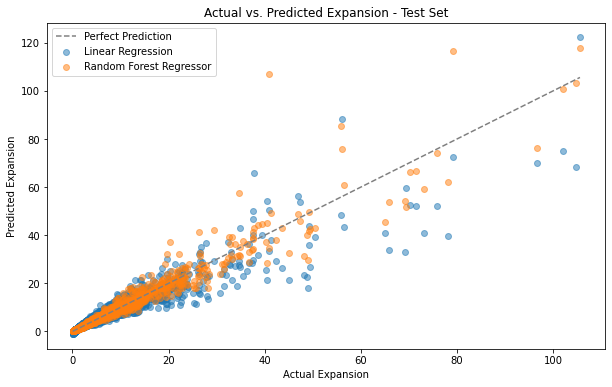

In [41]:
# Scatter Plot - Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_lr, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, y_test_pred_rf, label='Random Forest Regressor', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='gray', label='Perfect Prediction')
plt.xlabel('Actual Expansion')
plt.ylabel('Predicted Expansion')
plt.title('Actual vs. Predicted Expansion - Test Set')
plt.legend()
plt.show()


#### SVR
SVR training takes significantly longer than the other two models (more than two days) so I'll be running training on various sections of the data

In [44]:
# This block of code splits the data into five different randomly generated subsections
# Shuffle the dataset
shuffled_dataset = df.sample(frac=1, random_state=42)  

# Calculate the number of samples in each section
total_samples = len(shuffled_dataset)
samples_per_section = total_samples // 5

# Split the shuffled dataset into five sections
df1 = shuffled_dataset.iloc[:samples_per_section]
df2 = shuffled_dataset.iloc[samples_per_section:2 * samples_per_section]
df3 = shuffled_dataset.iloc[2 * samples_per_section:3 * samples_per_section]
df4 = shuffled_dataset.iloc[3 * samples_per_section:4 * samples_per_section]
df5 = shuffled_dataset.iloc[4 * samples_per_section:]

# Print the number of samples in each section
print(len(df1), len(df2), len(df3), len(df4), len(df5))


132506 132506 132506 132506 132506


In [47]:
from sklearn.svm import SVR

# Running training on df1
# Splitting the data into features (X) and target variable (y)
X = df1[['fire_line', 'size', 'speed', 'duration']]
y = df1['expansion']

# Splitting the data into training and testing sets with an 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training - SVR
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Predicting on train set
y_train_pred_svr = svr_model.predict(X_train)

# Evaluating the models on the training set
mae_svr_train1 = mean_absolute_error(y_train, y_train_pred_svr)
mse_svr_train1 = mean_squared_error(y_train, y_train_pred_svr)
rmse_svr_train1 = np.sqrt(mse_svr_train1)
r2_svr_train1 = r2_score(y_train, y_train_pred_svr)

print("SVR Dataset 1 - Training Set Metrics:")
print("MAE:", mae_svr_train1)
print("MSE:", mse_svr_train1)
print("RMSE:", rmse_svr_train1)
print("R²:", r2_svr_train1)

# Predicting on the test set
y_test_pred_svr = svr_model.predict(X_test)

# Evaluating the models on the test set
mae_svr_test1 = mean_absolute_error(y_test, y_test_pred_svr)
mse_svr_test1 = mean_squared_error(y_test, y_test_pred_svr)
rmse_svr_test1 = np.sqrt(mse_svr_test1)
r2_svr_test1 = r2_score(y_test, y_test_pred_svr)

print("SVR Dataset 1 - Test Set Metrics:")
print("MAE:", mae_svr_test1)
print("MSE:", mse_svr_test1)
print("RMSE:", rmse_svr_test1)
print("R²:", r2_svr_test1)

SVR Dataset 1 - Training Set Metrics:
MAE: 0.09383725670196158
MSE: 0.5262146550255372
RMSE: 0.7254065446530912
R²: 0.7825550212983095
SVR Dataset 1 - Test Set Metrics:
MAE: 0.10710344685016651
MSE: 1.4771334721860276
RMSE: 1.2153737993662803
R²: 0.6096128347188945


In [48]:
# Running training on df2
# Splitting the data into features (X) and target variable (y)
X2 = df2[['fire_line', 'size', 'speed', 'duration']]
y2 = df2['expansion']

# Splitting the data into training and testing sets with an 80:20 ratio
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Model training - SVR
svr_model2 = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model2.fit(X_train2, y_train2)

# Predicting on train set
y_train_pred_svr2 = svr_model2.predict(X_train2)

# Evaluating the models on the training set
mae_svr_train2 = mean_absolute_error(y_train2, y_train_pred_svr2)
mse_svr_train2 = mean_squared_error(y_train2, y_train_pred_svr2)
rmse_svr_train2 = np.sqrt(mse_svr_train2)
r2_svr_train2 = r2_score(y_train2, y_train_pred_svr2)

print("SVR Dataset 2 - Training Set Metrics:")
print("MAE:", mae_svr_train2)
print("MSE:", mse_svr_train2)
print("RMSE:", rmse_svr_train2)
print("R²:", r2_svr_train2)

# Predicting on the test set
y_test_pred_svr2 = svr_model2.predict(X_test2)

# Evaluating the models on the test set
mae_svr_test2 = mean_absolute_error(y_test2, y_test_pred_svr2)
mse_svr_test2 = mean_squared_error(y_test2, y_test_pred_svr2)
rmse_svr_test2 = np.sqrt(mse_svr_test2)
r2_svr_test2 = r2_score(y_test2, y_test_pred_svr2)

print("SVR Dataset 2 - Test Set Metrics:")
print("MAE:", mae_svr_test2)
print("MSE:", mse_svr_test2)
print("RMSE:", rmse_svr_test2)
print("R²:", r2_svr_test2)

SVR Dataset 2 - Training Set Metrics:
MAE: 0.09274310743866293
MSE: 0.6244682257999216
RMSE: 0.7902330199377406
R²: 0.7487149790751256
SVR Dataset 2 - Test Set Metrics:
MAE: 0.0969334736675817
MSE: 0.9960082492675704
RMSE: 0.9980021288892977
R²: 0.6566490316376596


In [49]:
# Running training on df3
# Splitting the data into features (X) and target variable (y)
X3 = df3[['fire_line', 'size', 'speed', 'duration']]
y3 = df3['expansion']

# Splitting the data into training and testing sets with an 80:20 ratio
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Model training - SVR
svr_model3 = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model3.fit(X_train3, y_train3)

# Predicting on train set
y_train_pred_svr3 = svr_model2.predict(X_train3)

# Evaluating the models on the training set
mae_svr_train3 = mean_absolute_error(y_train3, y_train_pred_svr3)
mse_svr_train3 = mean_squared_error(y_train3, y_train_pred_svr3)
rmse_svr_train3 = np.sqrt(mse_svr_train3)
r2_svr_train3 = r2_score(y_train3, y_train_pred_svr3)

print("SVR Dataset 3 - Training Set Metrics:")
print("MAE:", mae_svr_train3)
print("MSE:", mse_svr_train3)
print("RMSE:", rmse_svr_train3)
print("R²:", r2_svr_train3)

# Predicting on the test set
y_test_pred_svr3 = svr_model3.predict(X_test3)

# Evaluating the models on the test set
mae_svr_test3 = mean_absolute_error(y_test3, y_test_pred_svr3)
mse_svr_test3 = mean_squared_error(y_test3, y_test_pred_svr3)
rmse_svr_test3 = np.sqrt(mse_svr_test3)
r2_svr_test3 = r2_score(y_test3, y_test_pred_svr3)

print("SVR Dataset 3 - Test Set Metrics:")
print("MAE:", mae_svr_test3)
print("MSE:", mse_svr_test3)
print("RMSE:", rmse_svr_test3)
print("R²:", r2_svr_test3)

SVR Dataset 3 - Training Set Metrics:
MAE: 0.09674633332946268
MSE: 0.9125400668674162
RMSE: 0.9552696304538401
R²: 0.6810905493894179
SVR Dataset 3 - Test Set Metrics:
MAE: 0.09623652367381487
MSE: 0.7296966915924378
RMSE: 0.85422285827086
R²: 0.7307927657780224


In [50]:
# Running training on df4
# Splitting the data into features (X) and target variable (y)
X4 = df4[['fire_line', 'size', 'speed', 'duration']]
y4 = df4['expansion']

# Splitting the data into training and testing sets with an 80:20 ratio
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Model training - SVR
svr_model4 = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model4.fit(X_train4, y_train4)

# Predicting on train set
y_train_pred_svr4 = svr_model4.predict(X_train4)

# Evaluating the models on the training set
mae_svr_train4 = mean_absolute_error(y_train4, y_train_pred_svr4)
mse_svr_train4 = mean_squared_error(y_train4, y_train_pred_svr4)
rmse_svr_train4 = np.sqrt(mse_svr_train4)
r2_svr_train4 = r2_score(y_train4, y_train_pred_svr4)

print("SVR Dataset 4 - Training Set Metrics:")
print("MAE:", mae_svr_train4)
print("MSE:", mse_svr_train4)
print("RMSE:", rmse_svr_train4)
print("R²:", r2_svr_train4)

# Predicting on the test set
y_test_pred_svr4 = svr_model4.predict(X_test4)

# Evaluating the models on the test set
mae_svr_test4 = mean_absolute_error(y_test4, y_test_pred_svr4)
mse_svr_test4 = mean_squared_error(y_test4, y_test_pred_svr4)
rmse_svr_test4 = np.sqrt(mse_svr_test4)
r2_svr_test4 = r2_score(y_test4, y_test_pred_svr4)

print("SVR Dataset 4 - Test Set Metrics:")
print("MAE:", mae_svr_test4)
print("MSE:", mse_svr_test4)
print("RMSE:", rmse_svr_test4)
print("R²:", r2_svr_test4)

SVR Dataset 4 - Training Set Metrics:
MAE: 0.09499268520243587
MSE: 0.7745300473241706
RMSE: 0.8800738874231928
R²: 0.7085654768528383
SVR Dataset 4 - Test Set Metrics:
MAE: 0.09740247768001783
MSE: 0.7867030175083353
RMSE: 0.8869628050309298
R²: 0.6995458786345102


In [51]:
# Running training on df5
# Splitting the data into features (X) and target variable (y)
X5 = df5[['fire_line', 'size', 'speed', 'duration']]
y5 = df5['expansion']

# Splitting the data into training and testing sets with an 80:20 ratio
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.2, random_state=42)

# Model training - SVR
svr_model5 = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model5.fit(X_train5, y_train5)

# Predicting on train set
y_train_pred_svr5 = svr_model5.predict(X_train5)

# Evaluating the models on the training set
mae_svr_train5 = mean_absolute_error(y_train5, y_train_pred_svr5)
mse_svr_train5 = mean_squared_error(y_train5, y_train_pred_svr5)
rmse_svr_train5 = np.sqrt(mse_svr_train5)
r2_svr_train5 = r2_score(y_train5, y_train_pred_svr5)

print("SVR Dataset 5 - Training Set Metrics:")
print("MAE:", mae_svr_train5)
print("MSE:", mse_svr_train5)
print("RMSE:", rmse_svr_train5)
print("R²:", r2_svr_train5)

# Predicting on the test set
y_test_pred_svr5 = svr_model4.predict(X_test5)

# Evaluating the models on the test set
mae_svr_test5 = mean_absolute_error(y_test5, y_test_pred_svr5)
mse_svr_test5 = mean_squared_error(y_test5, y_test_pred_svr5)
rmse_svr_test5 = np.sqrt(mse_svr_test5)
r2_svr_test5 = r2_score(y_test5, y_test_pred_svr5)

print("SVR Dataset 5 - Test Set Metrics:")
print("MAE:", mae_svr_test5)
print("MSE:", mse_svr_test5)
print("RMSE:", rmse_svr_test5)
print("R²:", r2_svr_test5)

SVR Dataset 5 - Training Set Metrics:
MAE: 0.09950257595921712
MSE: 1.4570641763389636
RMSE: 1.2070891335518532
R²: 0.588775892477376
SVR Dataset 5 - Test Set Metrics:
MAE: 0.09741784063596728
MSE: 0.9871341024655632
RMSE: 0.9935462256309785
R²: 0.6564450805224119


<Figure size 720x432 with 0 Axes>

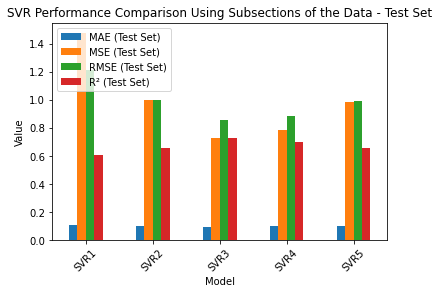

In [52]:
# Bar plot for SVR model metrics
metrics_df = pd.DataFrame({
    'Model': ['SVR1', 'SVR2', 'SVR3', 'SVR4', 'SVR5'],
    'MAE (Test Set)': [mae_svr_test1, mae_svr_test2, mae_svr_test3, mae_svr_test4, mae_svr_test5],
    'MSE (Test Set)': [mse_svr_test1, mse_svr_test2, mse_svr_test3, mse_svr_test4, mse_svr_test5],
    'RMSE (Test Set)': [rmse_svr_test1, rmse_svr_test2, rmse_svr_test3, rmse_svr_test4, rmse_svr_test5],
    'R² (Test Set)': [r2_svr_test1, r2_svr_test2, r2_svr_test3, r2_svr_test4, r2_svr_test5]
})

plt.figure(figsize=(10, 6))
metrics_df.plot(x='Model', kind='bar')
plt.title('SVR Performance Comparison Using Subsections of the Data - Test Set')
plt.ylabel('Value')
plt.xlabel('Model')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()


In [55]:
# Finding the average of the metrics on the test set
print("Average MAE", np.average([mae_svr_test1, mae_svr_test2, mae_svr_test3, mae_svr_test4, mae_svr_test5]))
print("\nAverage MSE", np.average([mse_svr_test1, mse_svr_test2, mse_svr_test3, mse_svr_test4, mse_svr_test5]))
print("\nAverage RMSE", np.average([rmse_svr_test1, rmse_svr_test2, rmse_svr_test3, rmse_svr_test4, rmse_svr_test5]))
print("\nAverage R-Squared", np.average([r2_svr_test1, r2_svr_test2, r2_svr_test3, r2_svr_test4, r2_svr_test5]))

Average MAE 0.09901875250150964

Average MSE 0.9953351066039868

RMSE Average 0.9896215634376693

Average R-Squared 0.6706091182582997
